In [ ]:
import random
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [ ]:
!pip -q install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.1 MB/s eta 0:00:00


In [ ]:
import transformers
print(transformers.__version__)

4.30.2


In [ ]:
data = pd.read_csv('dataset_komen.csv')
data.head()

,Komentar,Label
0,Hiii semua cuman mau ngasih tau kalo dana 500k...,POSITIVE
1,"Sejauh ini dana ku baik baik aja,kalian aja no...",POSITIVE
2,Ni gimana dah pelayanan dana kok gada yang ben...,NEGATIVE
3,Selamanya saya bakalan black campaign layanan ...,NEGATIVE
4,Dana gua premium setiap bulan limit abis mulu ...,POSITIVE


In [ ]:
#string to int
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()


data['Label'] = lb.fit_transform(data['Label'])
data

,Komentar,Label
0,Hiii semua cuman mau ngasih tau kalo dana 500k...,1
1,"Sejauh ini dana ku baik baik aja,kalian aja no...",1
2,Ni gimana dah pelayanan dana kok gada yang ben...,0
3,Selamanya saya bakalan black campaign layanan ...,0
4,Dana gua premium setiap bulan limit abis mulu ...,1
...,...,...
1327,@ccicpolri mohon di usut. Dana nasabah banyak ...,0
1328,@castamer_dana_id__ ini aku kenapa tiba2 nge d...,0
1329,@aladinbank.id pakai ini saja gak pernah eror...,0
1330,@21.2.for.xx,1


In [ ]:
raw_data = data.copy()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def clean_text(text):
    # Menghapus karakter yang tidak diinginkan
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Menghapus angka
    text = re.sub(r'\s+', ' ', text)  # Menghapus spasi berlebihan
    text = re.sub(r'[^\w\s]', '', text)# Menghapus simbol dan tanda baca
    text = re.sub(r'[^\x00-\x7F]+', '', text) # ascii
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Menghapus kata-kata tidak penting
    stopwords = ['dan', 'atau', 'juga', 'yang', 'untuk', 'karena', 'juga', 'tapi', 'yg', 'lg', 'ini', 'sih', 'saya', 'nih', 'ni', 'aku', 'ya', 'kami', 'lagi', 'udh', 'di', 'kita',
                 'terus', 'kok', 'jadi', 'tpi', 'tapi', 'sama', 'lain', 'sm', 'min', 'karna', 'ah', 'eh', 'oh', 'he','kamu', 'aku',
                 'diri', 'waduh', 'kan', 'itu', 'lalu', 'd', 'klo', 'pun', 'dr', 'nge', 'mah', 'ny', 'id', 'sy', 'ya', 'ye', 'yo', 'yu',
                 'itu', 'dari', 'kite', 'yaa', 'si', 'lah', 'gua', 'gue', 'iki', 'wooii', 'woy', 'ah', 'eh', 'oh', 'heyy',
                 'woi', 'gw', 'dari', 'bang', 'sya', 'ane', 'mulu', 'jt', 'rb', 'org', 'Ni', 'in', 'lah', 'wooiiii', 'Saya', 'Wooiiii',
                 'oii', 'gtu', 'gya', 'nii', 'jga', 'duh', 'dah', 'deh', 'nang', 'p', 'cs', 'wooiiii', 'woooyyy', 'WOIII', 'Woi', 'WOI',
                 'ribu', 'g', 'njii', 'lot', 'loh', 'x', 'lu', 'woe', 'yg', 'kak', 'woyy', 'woyyy', 'woiii', 'woii', 'woiiiiiii',
                 'aq', 'tgl', 'dong', 'kali', 'rill', 'wahh', 'trss', 'sya', 'k', 'dab', 'ok', 'test', 'yok', 'kk', 'wooiiii',
                 'pak','rp', 'kok', 'kek', 'bosku', 'nya', 'bang', 'ka', 'gais', 'gih', 'l', 'Tes', 'oy', 'ki', 'ku', 'ke', 'ko', 'yah'
                 ,'jt', 'hiii']  # Daftar kata-kata tidak penting
    text = ' '.join(word for word in text.split() if word not in stopwords)

    return text

def clean_dataset(data):
    cleaned_dataset = []

    for text in data:
        cleaned_text = clean_text(text)
        cleaned_dataset.append(cleaned_text)

    return cleaned_dataset

In [ ]:
data['Komentar'] = clean_dataset(data['Komentar'])
data

,Komentar,Label
0,semua cuman mau ngasih tau kalo dana udah bali...,1
1,jauh dana baik baik ajakalian aja norak mungki...,1
2,gimana layan dana gada bener apa minta viral d...,0
3,lama bakal black campaign layan sampah kalian ...,0
4,dana premium tiap bulan limit abis batas juta ...,1
...,...,...
1327,ccicpolri mohon usut dana nasabah banyak pending,0
1328,castamerdanaid kenapa tiba dm minta nomor wa s...,0
1329,aladinbankid pakai saja gak pernah eror gajela...,0
1330,forxx,1


In [ ]:
raw_data = data.copy()

In [ ]:
data = data.drop_duplicates()

In [ ]:
nan_data = data[data.isna().any(axis=1)]
nan_data

,Komentar,Label


In [ ]:
data = data.dropna()

In [ ]:
data

,Komentar,Label
0,semua cuman mau ngasih tau kalo dana udah bali...,1
1,jauh dana baik baik ajakalian aja norak mungki...,1
2,gimana layan dana gada bener apa minta viral d...,0
3,lama bakal black campaign layan sampah kalian ...,0
4,dana premium tiap bulan limit abis batas juta ...,1
...,...,...
1327,ccicpolri mohon usut dana nasabah banyak pending,0
1328,castamerdanaid kenapa tiba dm minta nomor wa s...,0
1329,aladinbankid pakai saja gak pernah eror gajela...,0
1330,forxx,1


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return stemmer.stem(text)

data['Komentar'] = data['Komentar'].apply(stem_text)

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.3)
df_val, df_test = train_test_split(df_test, test_size=0.7)

df_train.shape, df_test.shape, df_val.shape

((888, 2), (267, 2), (114, 2))

In [ ]:
PRE_TRAINED_MODEL = 'indobenchmark/indobert-base-p2'

In [ ]:
from transformers import BertTokenizer #model Bert

bert_tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL)

In [ ]:
vocabulary = bert_tokenizer.get_vocab()

print('Panjang vocabulary:', len(vocabulary))
print (vocabulary)

Panjang vocabulary: 30521
{'[PAD]': 0, '[UNK]': 1, '[CLS]': 2, '[SEP]': 3, '[MASK]': 4, '##an': 5, 'd': 6, '##er': 7, 'm': 8, '##en': 9, 's': 10, 'p': 11, '##ar': 12, 'b': 13, 'k': 14, '##at': 15, '##ang': 16, '##in': 17, 't': 18, '##ak': 19, '##al': 20, '##ah': 21, '##as': 22, '##un': 23, '##am': 24, '##em': 25, 'di': 26, '##ya': 27, '##el': 28, '##ad': 29, '##eng': 30, 'y': 31, '##kan': 32, '##tu': 33, 'yang': 34, 'se': 35, '##ap': 36, '##is': 37, 'l': 38, '##ik': 39, 'h': 40, 'dan': 41, 'j': 42, 'ke': 43, '##il': 44, 'men': 45, '##on': 46, '##it': 47, 'in': 48, 'ber': 49, '##us': 50, '##ga': 51, '##or': 52, '##es': 53, 'ter': 54, '##ing': 55, 'r': 56, '##nya': 57, '##ur': 58, '##akan': 59, 'mem': 60, 'c': 61, 'per': 62, '##ut': 63, '##id': 64, '##ari': 65, '##ul': 66, '##um': 67, 'n': 68, '##ada': 69, '##uk': 70, '##ek': 71, '##ir': 72, '##ol': 73, '##ih': 74, '##engan': 75, '##ung': 76, '##eb': 77, 'un': 78, 'dengan': 79, 'meng': 80, '##tuk': 81, '##ag': 82, 'g': 83, '##et': 84, '#

In [ ]:
#contoh token
id_data = 3

print('kalimat:', raw_data.Komentar[id_data])
print('BERT TOKENIZER:', bert_tokenizer.tokenize(data.Komentar[id_data]))

kalimat: lama bakal black campaign layan sampah kalian akun bajak uang curi kalian tidak bantu sekali bahkan dar memberitahu nomor rekening bajak kalian tidak mau
BERT TOKENIZER: ['lama', 'bakal', 'black', 'camp', '##ai', '##gn', 'lay', '##an', 'sampah', 'kalian', 'akun', 'bajak', 'uang', 'curi', 'kalian', 'tidak', 'bantu', 'sekali', 'bahkan', 'dar', 'memberitahu', 'nomor', 'rekening', 'bajak', 'kalian', 'tidak', 'mau']


In [ ]:
bert_input = bert_tokenizer.encode_plus(
    data.Komentar[id_data],         #sample kalimat
    add_special_tokens = True,      #tambah token CLS awal kalimat dan [SEP] akhir kalimat
    padding = 'max_length',         #tambah padding ke max guna token [SEP] jika kalimat kurang dari max
    truncation = 'longest_first',   # truncate jika kalimat lebih dari max
    max_length = 50,                #panjang kalimat
    return_attention_mask = True,   # mengembalikan attentioon mask
    return_token_type_ids = True    # mengembalikan nilai token type id
    )

bert_input.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
print('kalimat\t\t:', raw_data.Komentar[id_data])
print('Tokenizer\t:', bert_tokenizer.convert_ids_to_tokens(bert_input['input_ids']))
print('Input IDs\t', bert_input['input_ids'])
print('Token Type IDs\t:', bert_input['token_type_ids'])
print('Attention Mask\t:', bert_input['attention_mask'])

kalimat		: lama bakal black campaign layan sampah kalian akun bajak uang curi kalian tidak bantu sekali bahkan dar memberitahu nomor rekening bajak kalian tidak mau
Tokenizer	: ['[CLS]', 'lama', 'bakal', 'black', 'camp', '##ai', '##gn', 'lay', '##an', 'sampah', 'kalian', 'akun', 'bajak', 'uang', 'curi', 'kalian', 'tidak', 'bantu', 'sekali', 'bahkan', 'dar', 'memberitahu', 'nomor', 'rekening', 'bajak', 'kalian', 'tidak', 'mau', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
Input IDs	 [2, 985, 2990, 3293, 3023, 94, 1843, 933, 5, 3876, 1504, 2641, 20680, 988, 25734, 1504, 119, 1621, 684, 816, 1994, 10223, 1288, 4968, 20680, 1504, 119, 422, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Token Type IDs	: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

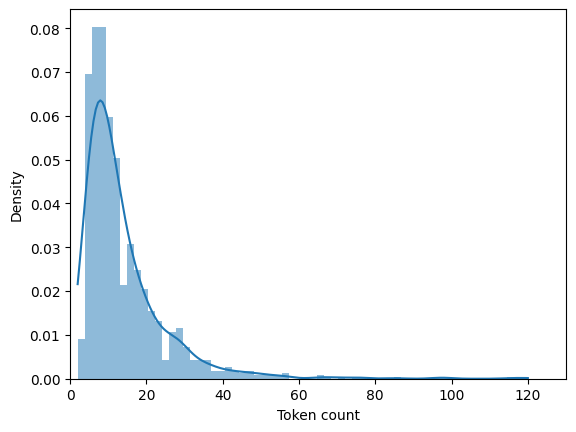

In [ ]:
token_lens = []

for txt in data.Komentar:
  tokens = bert_tokenizer.encode(txt)
  token_lens.append(len(tokens))

sns.histplot(token_lens, kde=True, stat='density', linewidth=0)
plt.xlim([0,130]);
plt.xlabel('Token count');

In [ ]:
MAX_LEN = 120

In [ ]:
def convert_example_to_feature(sentence):
  return bert_tokenizer.encode_plus(
      sentence,
      add_special_tokens = True,
      padding = 'max_length',
      truncation = 'longest_first',
      max_length = MAX_LEN,
      return_attention_mask = True,
      return_token_type_ids  = True
      )

In [ ]:
def map_example_to_dict(input_ids, attention_mask, token_type_ids, label):
  return {
      "input_ids": input_ids,
      "token_type_ids":token_type_ids,
      "attention_mask":attention_mask,
      }, label

In [ ]:
def encode(data):
  input_ids_list = []
  token_type_ids_list = []
  attention_mask_list = []
  label_list = []

  for row in data.itertuples(index=False):
    sentence = row.Komentar
    label = row.Label
    bert_input = convert_example_to_feature(sentence)

    input_ids_list.append(bert_input['input_ids'])
    token_type_ids_list.append(bert_input['token_type_ids'])
    attention_mask_list.append(bert_input['attention_mask'])
    label_list.append([label])

  return tf.data.Dataset.from_tensor_slices((input_ids_list, attention_mask_list, token_type_ids_list, label_list)).map(map_example_to_dict)

In [ ]:
EPOCHS = 5
BATCH_SIZE = 32
LEARNING_RATE = 5e-5

In [ ]:
train_encode = encode(df_train).batch(BATCH_SIZE)
test_encode = encode(df_test).batch(BATCH_SIZE)
val_encode = encode(df_val).batch(BATCH_SIZE)

In [ ]:
from transformers import TFBertForSequenceClassification

bert_model = TFBertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL, num_labels=3)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p2 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#Optimizer

optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

#compile model
bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
%time
bert_history = bert_model.fit(train_encode, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=val_encode)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs
Epoch 1/5
28/28 [==============================] - 1439s 50s/step - loss: 0.4836 - accuracy: 0.8029 - val_loss: 0.4252 - val_accuracy: 0.8246
Epoch 2/5
28/28 [==============================] - 1380s 49s/step - loss: 0.3114 - accuracy: 0.8795 - val_loss: 0.5341 - val_accuracy: 0.7895
Epoch 3/5
28/28 [==============================] - 1389s 50s/step - loss: 0.2047 - accuracy: 0.9291 - val_loss: 0.4054 - val_accuracy: 0.8246
Epoch 4/5
28/28 [==============================] - 1377s 49s/step - loss: 0.1336 - accuracy: 0.9505 - val_loss: 0.4658 - val_accuracy: 0.8421
Epoch 5/5
28/28 [==============================] - 1391s 50s/step - loss: 0.0796 - accuracy: 0.9752 - val_loss: 0.5288 - val_accuracy: 0.8070


In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

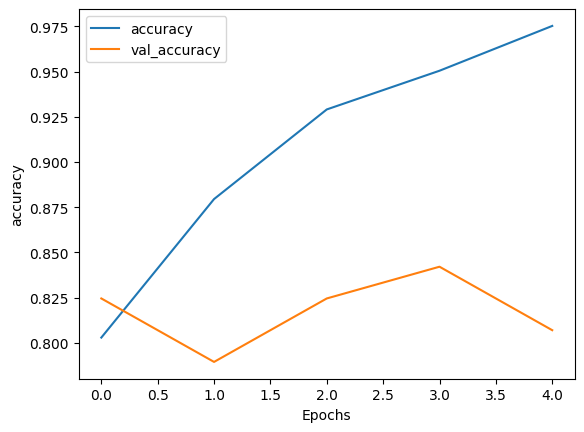

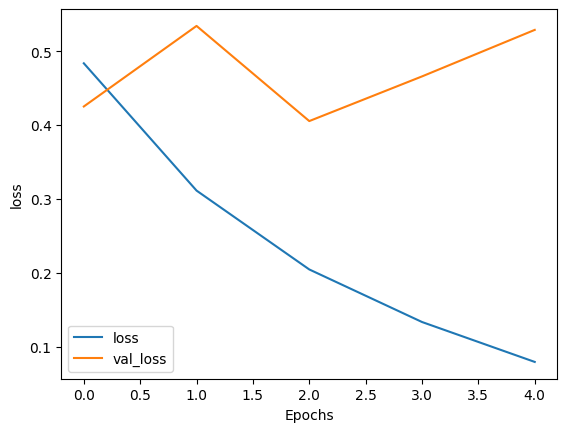

In [ ]:
plot_graphs(bert_history, 'accuracy')
plot_graphs(bert_history, 'loss')

In [ ]:
print('\nEpoch No. Train Accuracy Train Loss   Val Accuracy  Val Loss')
for i in range(EPOCHS):
  print(f'      {i+1}:     {bert_history.history["accuracy"][i]:.4f}      {bert_history.history["loss"][i]:.4f}        {bert_history.history["val_accuracy"][i]:.4f}        {bert_history.history["val_loss"][i]:.4f}')


Epoch No. Train Accuracy Train Loss   Val Accuracy  Val Loss
      1:     0.8029      0.4836        0.8246        0.4252
      2:     0.8795      0.3114        0.7895        0.5341
      3:     0.9291      0.2047        0.8246        0.4054
      4:     0.9505      0.1336        0.8421        0.4658
      5:     0.9752      0.0796        0.8070        0.5288


In [ ]:
bert_model.save_weights('bert-model.h5')

In [ ]:
bert_model.save_pretrained('bert_model')

In [ ]:
from google.colab import files
files.download('bert_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
score = bert_model.evaluate(test_encode)

print ("Test Accuracy:", score[1])

9/9 [==============================] - 119s 13s/step - loss: 0.5205 - accuracy: 0.8689
Test Accuracy: 0.8689138293266296


In [ ]:
predicted_raw = bert_model.predict(test_encode)

9/9 [==============================] - 132s 13s/step


In [ ]:
y_pred = np.argmax(predicted_raw['logits'], axis=1)
y_true = np.array(df_test['Label'])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

accuracy_score(y_true, y_pred)

0.8689138576779026

In [ ]:
confusion_matrix(y_true, y_pred)

array([[205,   9],
       [ 26,  27]])

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       214
           1       0.75      0.51      0.61        53

    accuracy                           0.87       267
   macro avg       0.82      0.73      0.76       267
weighted avg       0.86      0.87      0.86       267



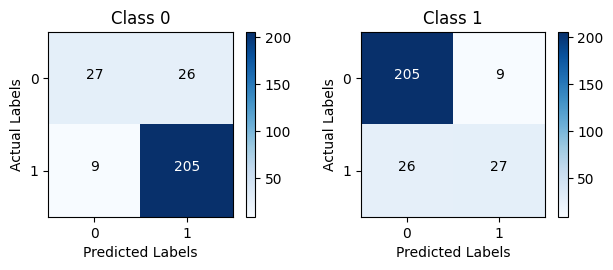

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

# Contoh Confusion Matrix untuk masalah multilabel
actual_labels = np.array(y_true)
predicted_labels = np.array(y_pred)

# Membuat Confusion Matrix multilabel
cm = multilabel_confusion_matrix(actual_labels, predicted_labels)

# Mengatur konfigurasi backend matplotlib di Colab
%matplotlib inline

# Menampilkan Confusion Matrix multilabel dalam bentuk gambar
for i, c in enumerate(cm):
    plt.subplot(2, 2, i+1)
    plt.imshow(c, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Class {i}')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['0', '1'])
    plt.yticks(tick_marks, ['0', '1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    thresh = c.max() / 2.
    for i in range(c.shape[0]):
        for j in range(c.shape[1]):
            plt.text(j, i, format(c[i, j], 'd'),
                     horizontalalignment="center",
                     color="white" if c[i, j] > thresh else "black")

plt.tight_layout()
plt.show()


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud

data_negative = data[ (data['Label']==0)]
data_positive = data[ (data['Label']==1)]

negative_list=data_negative['Komentar'].tolist()
positive_list=data_positive['Komentar'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))
filtered_positive = filtered_positive.lower()

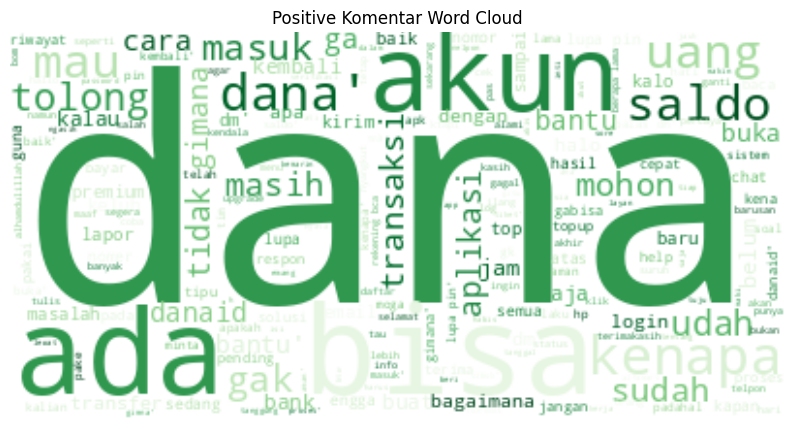

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color="white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Komentar Word Cloud")
plt.show()

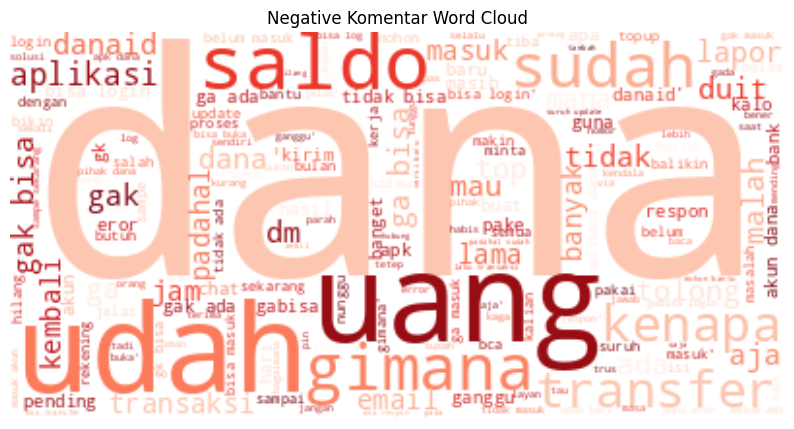

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color="white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Komentar Word Cloud")
plt.show()